<a href="https://colab.research.google.com/github/VardhanYadav/Cleanest-City-Prediction-Model/blob/main/Clean_City_oneDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install intel-tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: google-auth-oauthlib
    Found existing ins

In [9]:
pip uninstall keras ml-dtypes tensorboard

Found existing installation: keras 3.6.0
Uninstalling keras-3.6.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.6.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.6.0
Found existing installation: ml-dtypes 0.4.1
Uninstalling ml-dtypes-0.4.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/ml_dtypes-0.4.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/ml_dtypes/*
Proceed (Y/n)? Y
  Successfully uninstalled ml-dtypes-0.4.1
Found existing installation: tensorboard 2.17.1
Uninstalling tensorboard-2.17.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.10/dist-packages/tensorboard-2.17.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorboard/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorboard-2.17.1


In [10]:
pip install keras==2.14.0 ml-dtypes==0.2.0 tensorboard==2.14.0

  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached keras-2.14.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 19.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.14.0 which is incompatible.
tensorflow 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
tensorflow 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.14.0 which is incompatible.
tensorstore 0.1.66 requires ml-dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.


In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cleanest_Cities_India.csv to Cleanest_Cities_India.csv


In [4]:
data = pd.read_csv("Cleanest_Cities_India.csv")



In [5]:
X = data[['2016_Score', '2017_Score', '2018_Score', '2019_Score_5000', '2020_Score_Max6000', '2022_Score_Max7500', '2023_Score_Max10000']]
y = data['2024_Score_Predicted'] = data['2023_Score_Max10000'] + (data['2023_Score_Max10000'] - data['2016_Score']) / 7

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model_oneDNN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),  # Increase neurons
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

In [9]:
# Compiling the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Try lower learning rates
model_oneDNN.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])


In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [11]:
history = model_oneDNN.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100
14/14 [==============================] - 3s 80ms/step - loss: 4049656.5000 - mae: 534.7548 - val_loss: 6373551.5000 - val_mae: 736.2138
Epoch 2/100
14/14 [==============================] - 1s 44ms/step - loss: 4044711.2500 - mae: 534.7071 - val_loss: 6360199.0000 - val_mae: 736.0240
Epoch 3/100
14/14 [==============================] - 0s 31ms/step - loss: 4027580.5000 - mae: 534.5297 - val_loss: 6317925.0000 - val_mae: 735.2930
Epoch 4/100
14/14 [==============================] - 1s 38ms/step - loss: 3987652.7500 - mae: 534.0798 - val_loss: 6214536.0000 - val_mae: 733.2116
Epoch 5/100
14/14 [==============================] - 1s 37ms/step - loss: 3881434.2500 - mae: 532.3278 - val_loss: 5974492.5000 - val_mae: 727.6113
Epoch 6/100
14/14 [==============================] - 0s 36ms/step - loss: 3670370.7500 - mae: 530.5615 - val_loss: 5449040.5000 - val_mae: 713.1802
Epoch 7/100
14/14 [==============================] - 0s 33ms/step - loss: 3225449.7500 - mae: 518.6982 - val_los

In [12]:
y_pred_oneDNN = model_oneDNN.predict(X_test_scaled)
r2_oneDNN = r2_score(y_test, y_pred_oneDNN)
print(f"oneDNN R² score: {r2_oneDNN:.4f}")

4/4 [==============================] - 0s 5ms/step
oneDNN R² score: 0.9891


In [13]:
import matplotlib.pyplot as plt

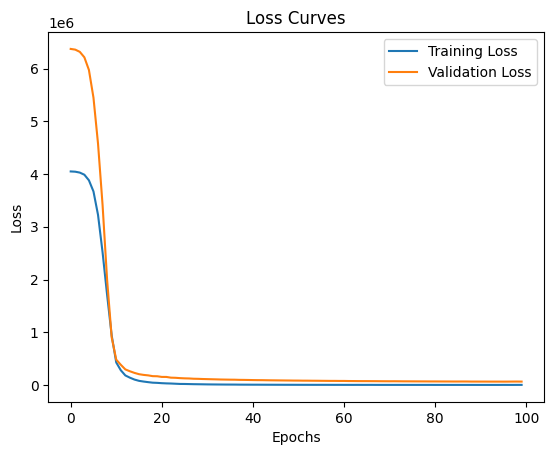

In [14]:
#Here is a graph for Training loss vs Validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()